In [1]:
# preparations
import pandas as pd
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt  # I prefer this for plots. 
from plotnine import *
warnings.filterwarnings("ignore")
# I copy this cell in every jupyter notebook, even sometimes some libraries are not used

## Outline of Steps for Random Walks and Return Probability Estimation
The assignment gives the following instructions: 

- Implement Random Walks in 1D, 2D, and 3D for T ∈ {100, 1000, 5000} steps

- Simulate the Random Walk for 𝑅 Repetitions

- Estimate the Return Probability for each dimension

- Plot the Estimated Probability vs Dimension for Different Values of 𝑇

- Extend to Higher Dimensions (Optional)

--------------------

My main ideas:

- for 1D, it means that the point can only move left(-1) or move right(+1).
- we can def a function for 1D (n repetitions): a originally=0, and b = np.random.uniform(0,1), if b<0.5, then a moves left(a=a-1); if b>=0.5, then a moves right(a=a+1). and we loop this for n times.
- to check whether a moves to the original point, we can set a flag. flag originally=0, and if a=0 at some point, flag=1. and we only need to check if flag ends up being 1.
- then we loop the function for 𝑅 Repetitions and see the probability.

In [2]:
"""
In this cell, I defined one_d(t) to simulate the random walk in 1D with t steps, and tried with t=100,1000,5000.
"""
def one_d(t):                           # def one_d(t) to simulate the random walk in 1D with t steps
    a=0                                 # a stand for the location of the point, originally it should be on the 0 point.
    flag=0                              # flag is for checking whether a returns. If a==0 again, flag=1
    for i in range (t):                 # a for loop to simulate each random step
        b = np.random.uniform(0,1)      # b represents the probabilities of moving left or right
        if b<0.5:                       # it's uniformly distributed, so it should be 0.5,0.5
            a=a-1                       # P(a moves left)==0.5
        else:
            a=a+1                       # P(a moves right)==0.5
        if a==0:                        # check if a returns in the end, if so, flag=1
            flag=1
    return flag                         # flag should be a binomial variable "yes, a returned" / "no, a didn't return"


t_list=[100,1000,5000]                  # try with t=100,1000,5000
for t in t_list:                        
    one_d_t=one_d(t)                    # I have to do this instead of printing directly, or it will loop again, wasting more time
    if one_d_t==1:              
        returned="returned"             # returned is a string for printing the results in words
    if one_d_t==0:
        returned="didn't return"
    print ("Within",t,"random steps, a",returned,"to the original point")



Within 100 random steps, a returned to the original point
Within 1000 random steps, a returned to the original point
Within 5000 random steps, a returned to the original point


- or we can use while loop. while a!=0: b = np.random.uniform(0,1), if b<0.5, a=a-1, else, a=a+1.
- in this way we can see how many steps it takes for a to get to the original point. but not needed.
- to make it run faster, it's better simply return 1 in the loop instead of returning in the end, after all loops are done

In [3]:
"""
In this cell, I defined two_d(t) to simulate the random walk in 2D with t steps, and tried with t=100,1000,5000.
The code is similar to last cell, but now another dimension is added.
I think it would be interesting if I plot a scatter plot for all the a coordinates here, but we won't be able to see it's moving order.
"""
def two_d(t):                           # def two_d(t) to simulate the random walk in 2D with t steps
    a1=0                                # now (a1,a2) is a's coordinate, a is in 2D
    a2=0
    for i in range (t):                 # a for loop to simulate each random step
        b = np.random.uniform(0,1)      # now here, b decides not only moving forwar/backward, but also in which dimension,
        if (b<0.25):                    # I wanted to set another variable for deciding moving in which dimension at first, 
            a1=a1-1                     # but then I realized "a1 forward","a1 backward","a2 forward","a2 backward" are all uniformly distributed, so there's no need
        elif (b<0.5):                   # these 4 if_conditions all have 0.25 probabilities to be true, because b~Uniform(0,1)
            a1=a1+1
        elif (b<0.75):
            a2=a2-1
        else:
            a2=a2+1
        if ((a1==0) and (a2==0)) is True:       # here, we need both a1 and a2 to be 0 to confirm that a returns
            return 1                            # actually we don't need to define a flag because the output of this function is binomial.
    return 0                                    # we can just return 1 in the if lines, so that the loop ends in advance and we can save time


t_list=[100,1000,5000]                          # try with t=100,1000,5000
for t in t_list:
    two_d_t=two_d(t)
    if two_d_t==1:
        returned="returned"
    if two_d_t==0:
        returned="didn't return"
    print ("Within",t,"random steps, (a1,a2)",returned,"to the original point")


Within 100 random steps, (a1,a2) returned to the original point
Within 1000 random steps, (a1,a2) returned to the original point
Within 5000 random steps, (a1,a2) didn't return to the original point


In [4]:
"""
In this cell, I defined three_d(t) to simulate the random walk in 3D with t steps, and tried with t=100,1000,5000.
The code is similar to last cell.
"""
def three_d(t):                         # def three_d(t) to simulate the random walk in 3D with t steps
    a1=0                                # now (a1,a2,a3) is a's coordinate, a is in 3D
    a2=0
    a3=0
    for i in range (t):                 # a for loop to simulate each random step
        b = np.random.uniform(0,1)
        if (b<1/6):                     # these 6 if_conditions all have 1/6 probabilities to be true, because b~Uniform(0,1)
            a1=a1-1
        elif (b<1/3):
            a1=a1+1
        elif (b<1/2):
            a2=a2-1
        elif (b<2/3):
            a2=a2+1
        elif (b<5/6):
            a3=a3-1
        else:
            a3=a3+1
        if ((a1==0) and (a2==0) and (a2==0)) is True:       # here, we need both a1,a2 and a3 to be all 0 to confirm that a returns
            return 1                                        # we can just return 1 in the if lines, so that the loop ends in advance and we can save time
    return 0


t_list=[100,1000,5000]                          # try with t=100,1000,5000
for t in t_list:
    three_d_t=three_d(t)
    if three_d_t==0:
        returned="didn't return"
    else:
        returned="returned"
    print ("Within",t,"random steps, (a1,a2,a3)",returned,"to the original point")

Within 100 random steps, (a1,a2,a3) didn't return to the original point
Within 1000 random steps, (a1,a2,a3) returned to the original point
Within 5000 random steps, (a1,a2,a3) returned to the original point


- Here is a problem: if I want to extend this function into higher dimensions, the if...elif...else... lines will be too long. 
- maybe we can just generate a random integer to decide which dimension moves in a.
d=np.random.randint(0,m)
- and we can set a as a list [0,0,....,0]. for i in range (n): a[d]=a[d]-1 or +1.

In [5]:
"""
In this cell, I extended random walk into higher dimensions.
I defined m_d(m,t) to simulate the random walk in m dimensions with t steps, 
and tried with t=100,1000,5000 in 4D. 
It would run extremely slowly if I try higher dimensions, but it can indeed give outputs.
"""
def m_d(m,t):                           # def m_d(m,t) to simulate the random walk in m dimensions with t steps
    a=[]                                # we don't know m value yet, so we can't just write a=[0,0,...,0].
    for i in range(m):                  # in order to define a's original coordinates, I have to append one 0 for each dimension in an empty list
        a.append(0)
    for i in range (t):                 # a for loop to simulate each random step
        b = np.random.uniform(0,1)      # now, b is only responsible for deciding whether +1 or -1.
        d=np.random.randint(0,m)        # d decides which dimension a moves in. also randomly generated, but here it's int
        if (b<0.5):                     # probabilities for whether +1 or -1 is simply 0.5,0.5
            a[d]=a[d]-1                 # a[d] stands for a moving on d_th dimension.
        else:
            a[d]=a[d]+1
        if all(ai==0 for ai in a):
            return 1                    # we can just return 1 in the if lines, so that the loop ends in advance and we can save time
    return 0


m=4                                     # try with m=4, t=100,1000,5000
t_list=[100,1000,5000]
for t in t_list:
    four_d_t=m_d(m,t)
    if four_d_t==0:
        returned="didn't return"
    else:
        returned="returned"
    print ("Within",t,"random steps, point a in",m,"dimensions",returned,"to the original point.")

Within 100 random steps, point a in 4 dimensions didn't return to the original point.
Within 1000 random steps, point a in 4 dimensions didn't return to the original point.
Within 5000 random steps, point a in 4 dimensions returned to the original point.


Now, we can estimate the probability for a to return to the original point (after repeating m_d(m,n) for R times).

In [6]:
"""
In this cell, I defined prob(m,t,R) to calculate the probability of a returning, in m dimensions, with t steps, repeated R times.
This is the ultimate function for everything.
"""

def prob(m,t,R):                    # def prob(m,t,R) to calculate the probability of a returning, in m dimensions, with t steps, repeated R times
    success=0                       # success stands for how many times a returned within R repetitions
    for i in range(R):              # repeat R simulations
        success=success+m_d(m,t)    # whenever a returns, success counts 1 time
    return success/R


t=1000                              # try with 1000 steps, 500 repetitions, 1D,2D,3D
R=500
for m in [1,2,3]:       
    print("The probability for a (",m,"D ) to return to the original point after",t,"steps is:",prob(m,t,R))
print("Here, I simulated 500 repetitions for each case.")

The probability for a ( 1 D ) to return to the original point after 1000 steps is: 0.968
The probability for a ( 2 D ) to return to the original point after 1000 steps is: 0.684
The probability for a ( 3 D ) to return to the original point after 1000 steps is: 0.352
Here, I simulated 500 repetitions for each case.


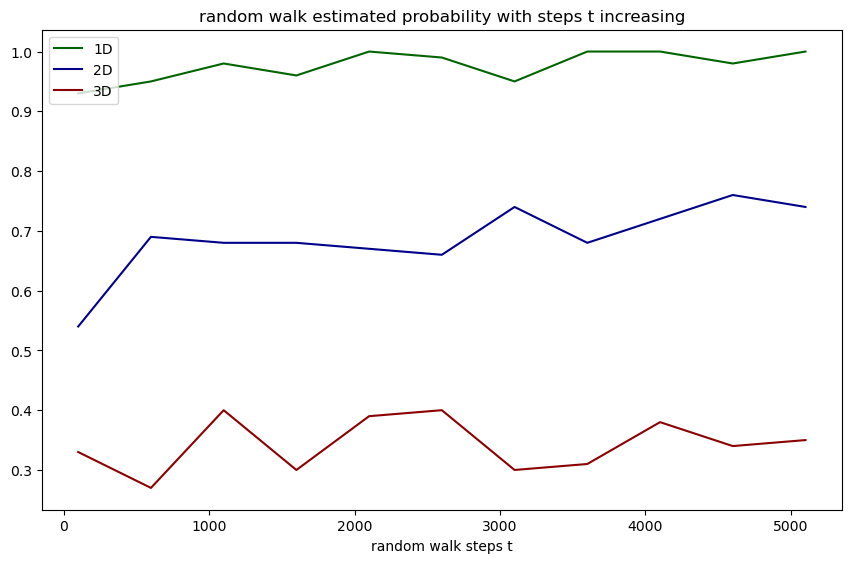

In [7]:
"""
In this cell, I plotted the probabilities of random walk returning within t steps.
I plotted 3 lines for 1D,2D,3D in one plot.
This cell runs extremely slowly. It took 20 seconds on my laptop. I can't do anything more to raise efficiency.
"""

t_list=list(range(100,5200,500))        # simulate random walks with different step range
list_1d=[]                              # empty lists to store values for plotting
list_2d=[]          
list_3d=[]

R=100                                   # here, I repeated 100 simulations for each dimension and each step. 
for t in t_list:
    list_1d.append(prob(1,t,R))         # store all probability values in lists
    list_2d.append(prob(2,t,R))     
    list_3d.append(prob(3,t,R))

fig = plt.figure(figsize=(10,6))        
ax = fig.add_axes([0.1,0.1,0.8,0.8])     
ax.set_title('random walk estimated probability with steps t increasing')       
ax.plot(t_list,list_1d,color='darkgreen',label = '1D')      # plot estimated probability for 1D,2D,3D
ax.plot(t_list,list_2d,color='darkblue',label = '2D') 
ax.plot(t_list,list_3d,color='darkred',label = '3D')
ax.set_xlabel("random walk steps t")

plt.legend(loc = 'upper left')          # top left legend
plt.show()
        

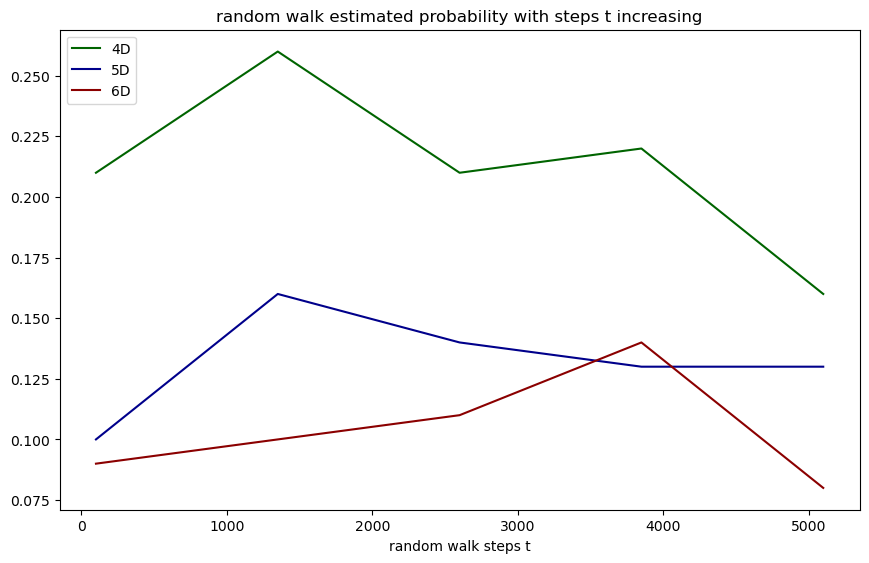

In [8]:
"""
In this cell, I extended the plot to higher dimensions.
I plotted 3 lines for 4D,5D,6D in one plot.
This cell runs even more slowly. I think the step range I used here are not large enough to draw conclusions. 
But I can't use wider step ranges, or it would waste me more time to test.
The code is basically the same as the last cell, except that I changed 1-3D to 4-6D.
"""
t_list=list(range(100,5200,1250))
list_4d=[]
list_5d=[]
list_6d=[]

R=100
for t in t_list:
    list_4d.append(prob(4,t,R))
    list_5d.append(prob(5,t,R))
    list_6d.append(prob(6,t,R))

fig = plt.figure(figsize=(10,6))        # Setting image size=10*6
ax = fig.add_axes([0.1,0.1,0.8,0.8])     
ax.set_title('random walk estimated probability with steps t increasing')      # Setting image title
ax.plot(t_list,list_4d,color='darkgreen',label = '4D')      # plot estimated probability
ax.plot(t_list,list_5d,color='darkblue',label = '5D') 
ax.plot(t_list,list_6d,color='darkred',label = '6D')
ax.set_xlabel("random walk steps t")

plt.legend(loc = 'upper left')          # top left legend
plt.show()

Surprisingly, with steps allowed in simulations increasing, the probabilities of a returning to the original point don't significantly increase. Maybe it's because random walks are Markov chains. The results and the plots will be more accurate if we set R=1000 or more, but I think that will take minutes to run.

------
-------
------